In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler


In [243]:
df = pd.read_excel('/content/default of credit card clients.xlsx',header=1)


In [244]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [245]:
df.shape

(30000, 25)

Attribute Information:
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005;

 X7 = the repayment status in August, 2005; . . .;

 X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: 
 
 -1 = pay duly; 
 
 1 = payment delay for one month; 
 
 2 = payment delay for two months;
 
  . . .; 8 = payment delay for eight months; 
  
  9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
Y: Target Column - binary variable, default payment (Yes = 1, No = 0)

Relevant Papers:
Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.


In [246]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [248]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [249]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [250]:
df['MARRIAGE'].value_counts() #(1 = married; 2 = single; 3 = others)

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [251]:

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [252]:
df.rename(columns={'default payment next month':'Default'},inplace=True)

In [253]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [255]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [256]:
for value in df.columns:
  print (df[value].value_counts())

1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: ID, Length: 30000, dtype: int64
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64
2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
5

In [257]:
df=df[df['MARRIAGE']!=0]
df=df.reset_index(drop=True)

In [258]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29941,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29942,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29943,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29944,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [259]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
Name: MARRIAGE, dtype: int64

In [260]:
df['EDUCATION'].value_counts()

2    14024
1    10581
3     4873
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

<Axes: >

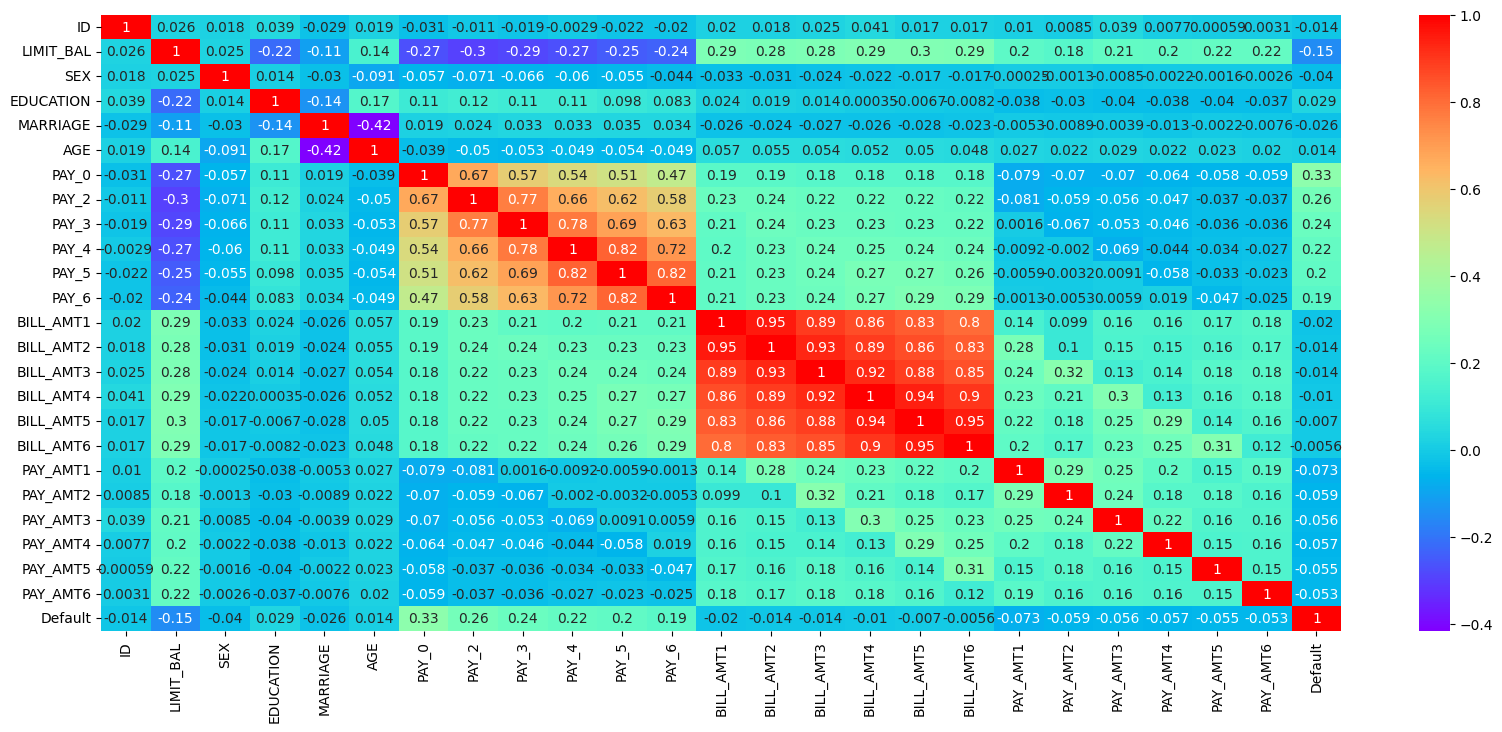

In [261]:
plt.subplots(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

when we look at the (BILL-AMT1,BILL-AMT2,BILL-AMT3,BILL-AMT4,BILL-AMT5,BILL-AMT6) those are in very big relationhip we can say this keep heat map these are in high correlation all values are above 0.8.so we can put this 6 column in to 2 column.

In [262]:
from sklearn.decomposition import PCA

In [263]:
pca=PCA(n_components=2)
cols=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
fit_col=pca.fit_transform(df[cols])
d_frame=pd.DataFrame(data=fit_col,columns=['col1','col2'])
d_frame

,col1,col2
0,-107402.351395,1829.455358
1,-103973.725753,-3335.699307
2,-68987.687776,2601.886613
3,-14888.002559,11321.067548
4,-66890.429559,-15898.129382
...,...,...
29941,200681.965297,148423.532876
29942,-102261.290642,-4431.353303
29943,-83800.081007,-22833.493335
29944,-1476.137993,-10494.322232


In [264]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29941,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29942,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29943,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29944,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [265]:
final=pd.concat([df,d_frame],axis=1)

In [266]:
final

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,col1,col2
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-107402.351395,1829.455358
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,-103973.725753,-3335.699307
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,-68987.687776,2601.886613
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,-14888.002559,11321.067548
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-66890.429559,-15898.129382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29941,29996,220000,1,3,1,39,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,200681.965297,148423.532876
29942,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,1837,3526,8998,129,0,0,0,-102261.290642,-4431.353303
29943,29998,30000,1,2,2,37,4,3,2,-1,...,19357,0,0,22000,4200,2000,3100,1,-83800.081007,-22833.493335
29944,29999,80000,1,3,1,41,1,-1,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,-1476.137993,-10494.322232


In [267]:
Update_data=final.drop(df[cols],axis=1)

In [268]:
Update_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,col1,col2
0,1,20000,2,2,1,24,2,2,-1,-1,...,-2,0,689,0,0,0,0,1,-107402.351395,1829.455358
1,2,120000,2,2,2,26,-1,2,0,0,...,2,0,1000,1000,1000,0,2000,1,-103973.725753,-3335.699307
2,3,90000,2,2,2,34,0,0,0,0,...,0,1518,1500,1000,1000,1000,5000,0,-68987.687776,2601.886613
3,4,50000,2,2,1,37,0,0,0,0,...,0,2000,2019,1200,1100,1069,1000,0,-14888.002559,11321.067548
4,5,50000,1,2,1,57,-1,0,-1,0,...,0,2000,36681,10000,9000,689,679,0,-66890.429559,-15898.129382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29941,29996,220000,1,3,1,39,0,0,0,0,...,0,8500,20000,5003,3047,5000,1000,0,200681.965297,148423.532876
29942,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,1837,3526,8998,129,0,0,0,-102261.290642,-4431.353303
29943,29998,30000,1,2,2,37,4,3,2,-1,...,0,0,0,22000,4200,2000,3100,1,-83800.081007,-22833.493335
29944,29999,80000,1,3,1,41,1,-1,0,0,...,-1,85900,3409,1178,1926,52964,1804,1,-1476.137993,-10494.322232


<Axes: >

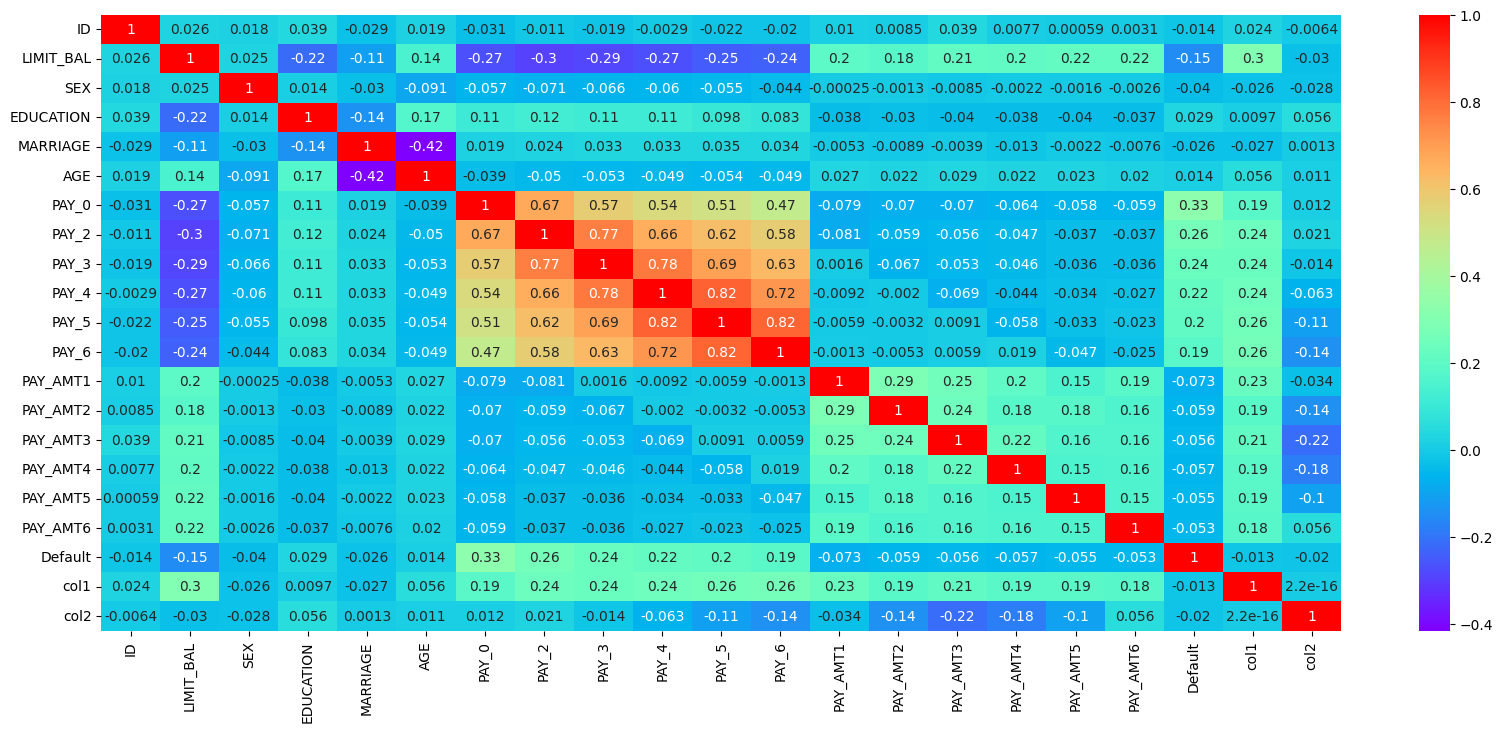

In [269]:
plt.subplots(figsize=(20,8))
sns.heatmap(Update_data.corr(),annot=True,cmap='rainbow')

In [270]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [271]:
df_cat=df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
df_int=df.drop(columns=df_cat)
df_int_N=df_int.drop(columns='ID')


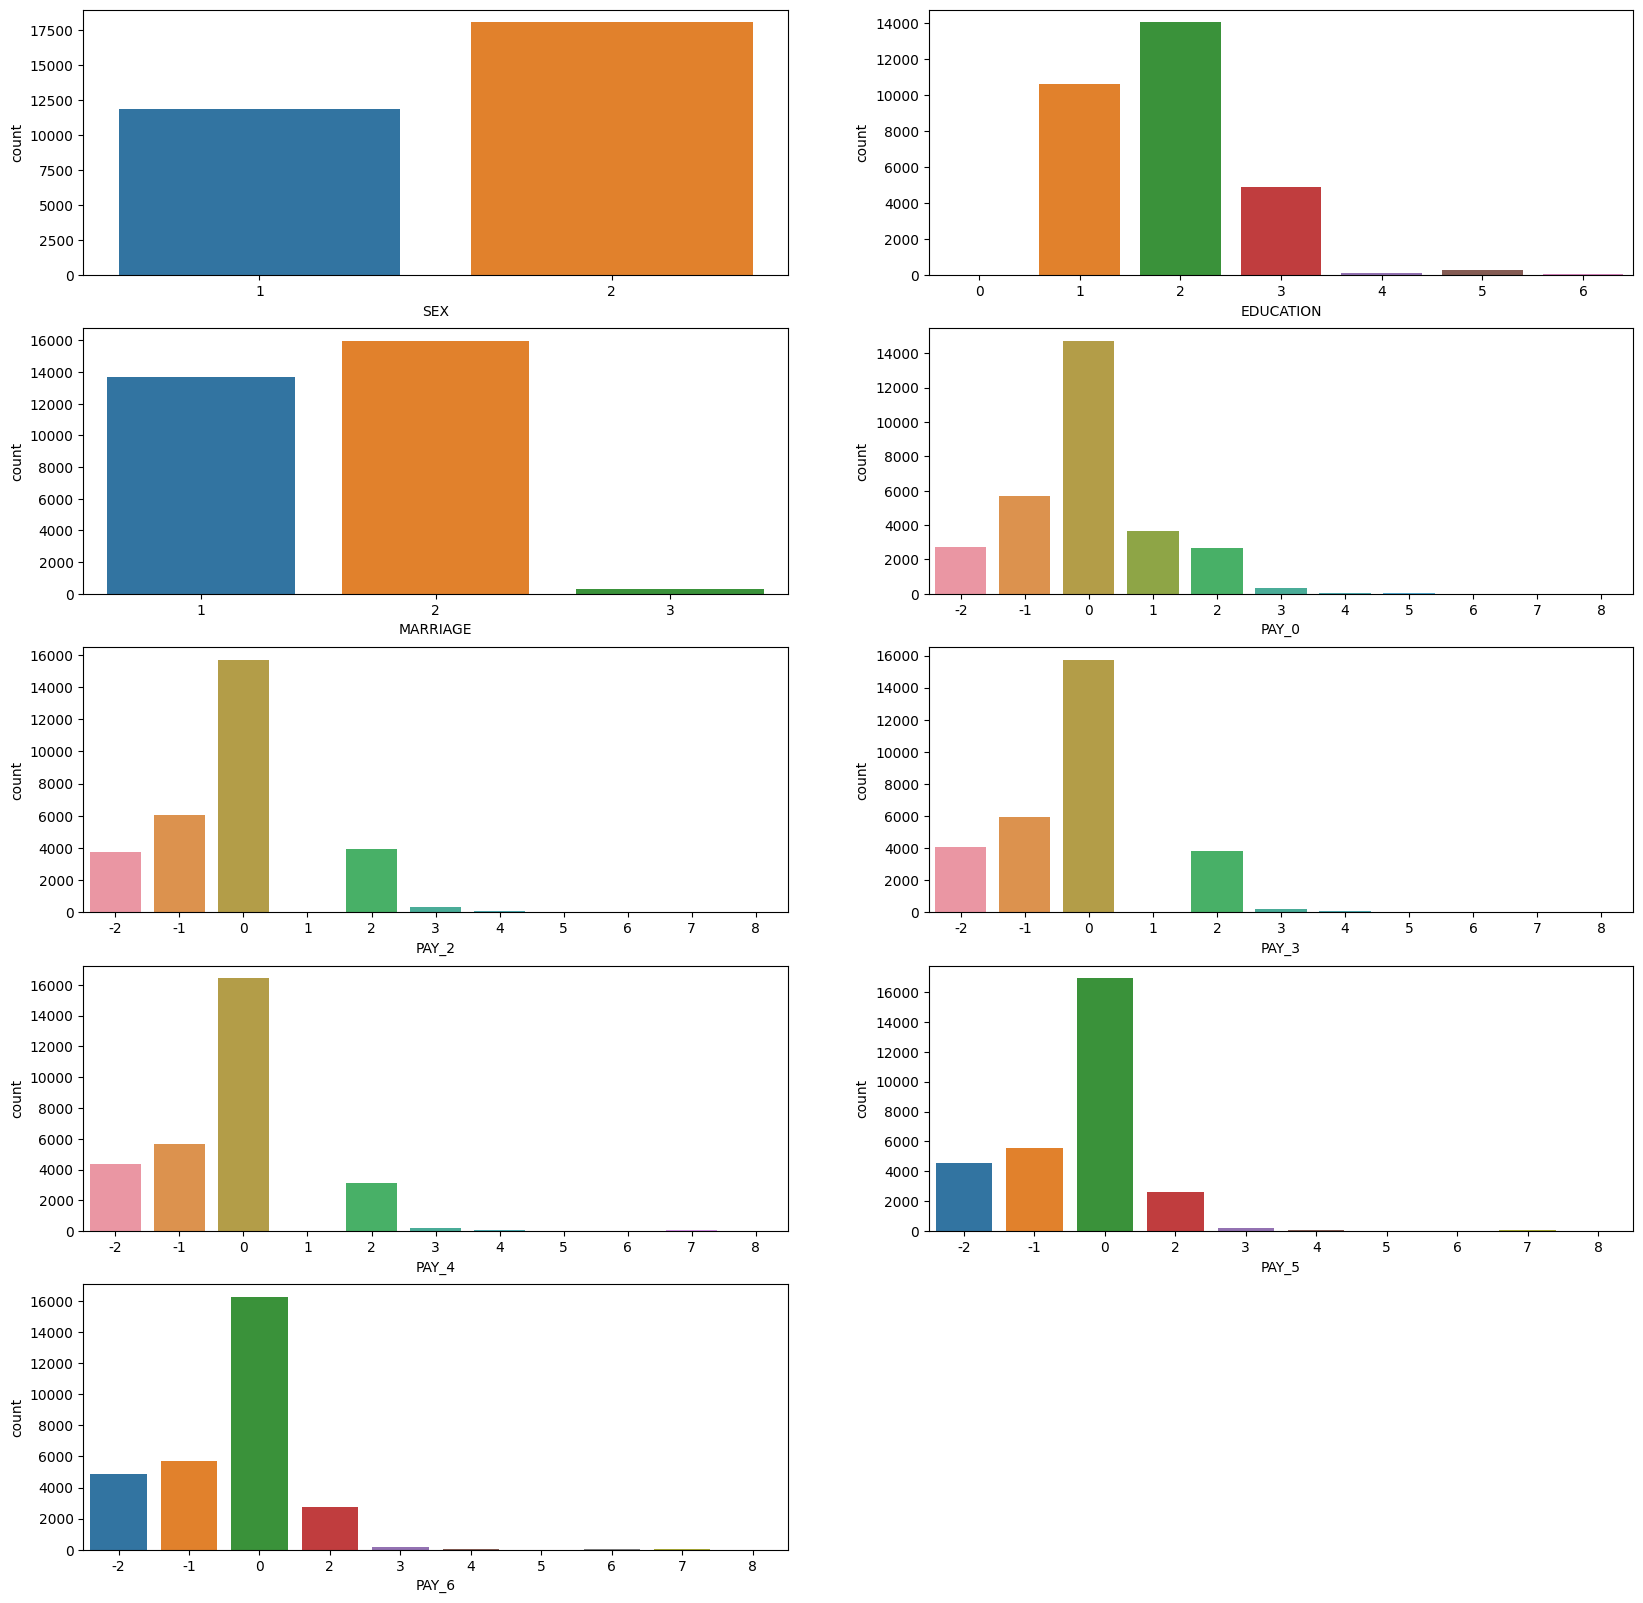

In [272]:
plt.figure(figsize=(20,20))
for i, col in enumerate(df_cat):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=col, data=df_cat)


In [273]:
df['SEX'].value_counts()

2    18072
1    11874
Name: SEX, dtype: int64

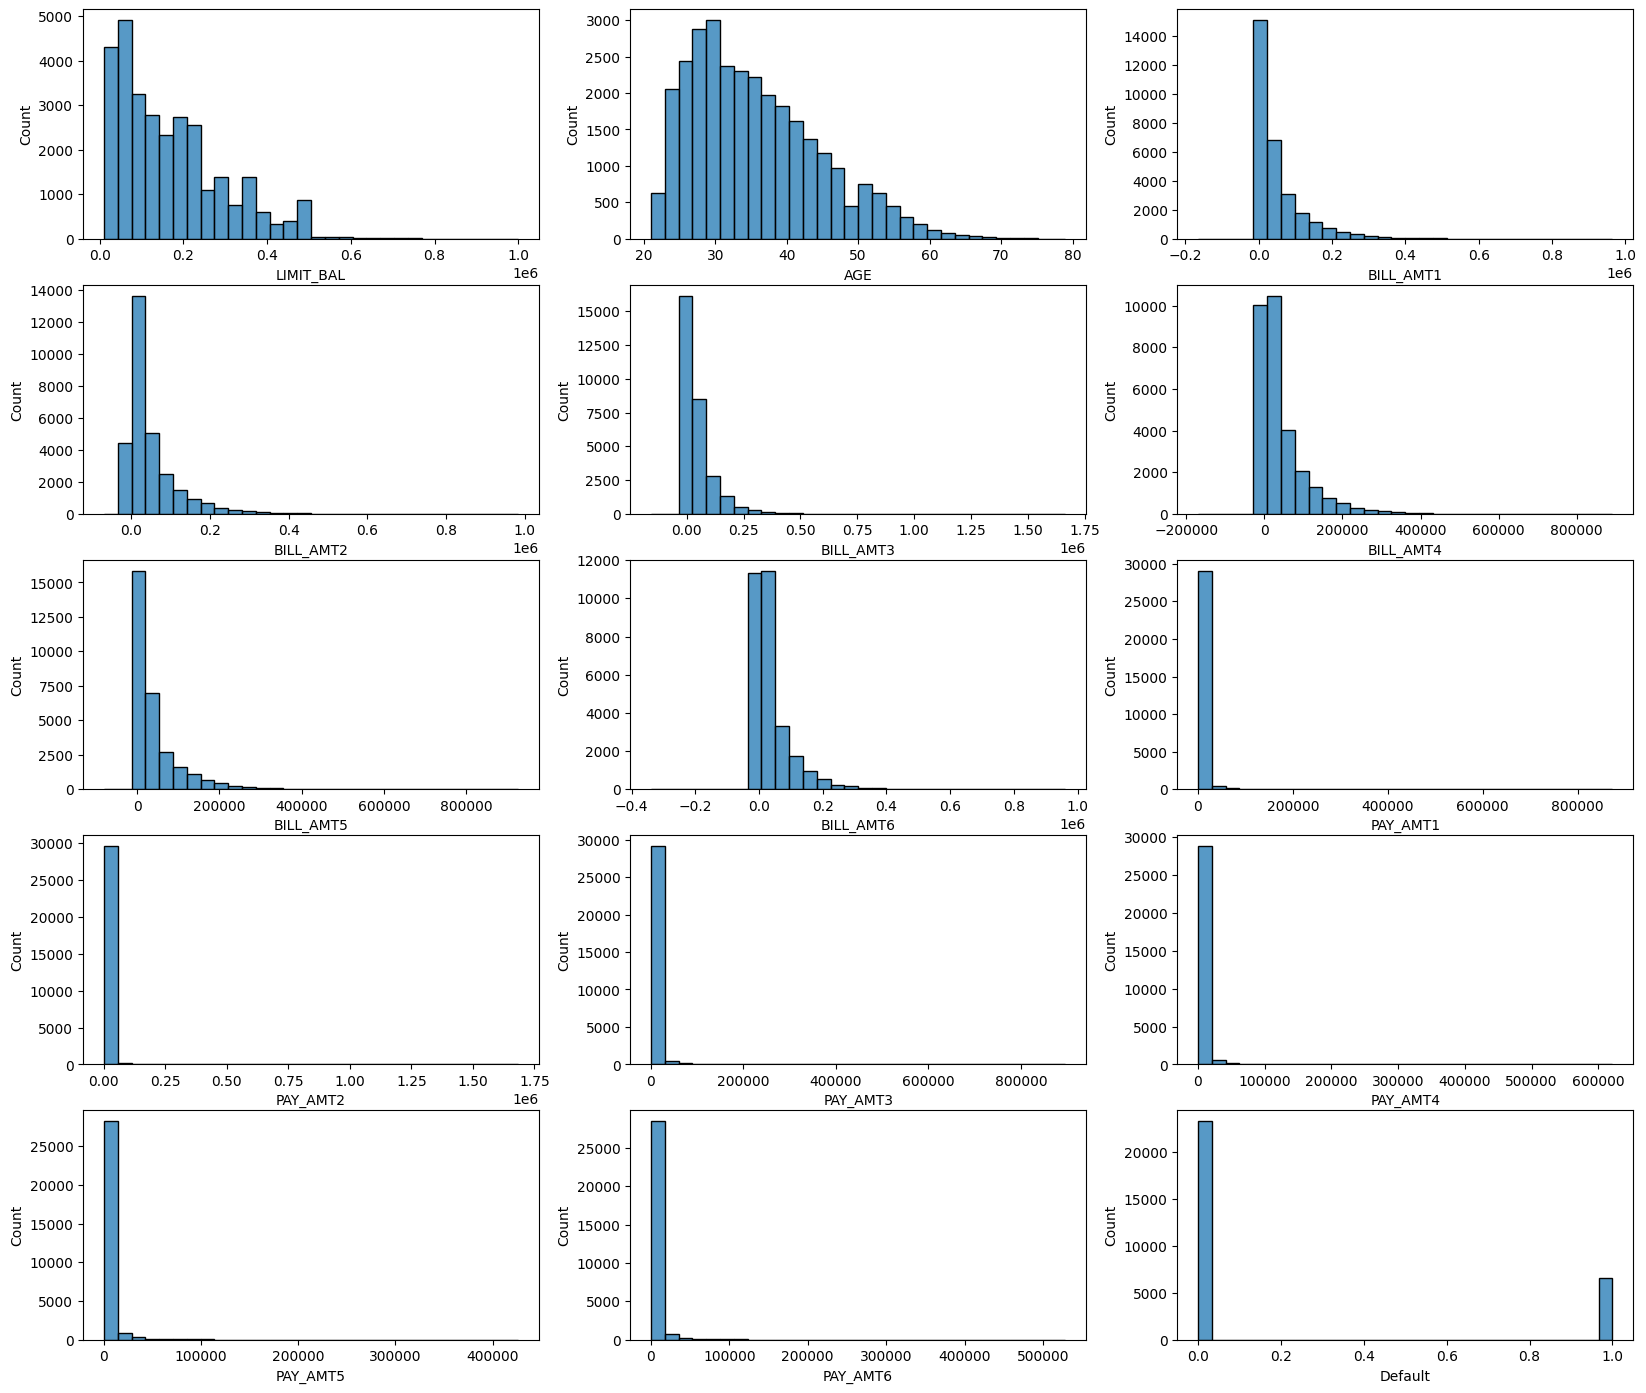

In [274]:
plt.figure(figsize=(20,28))

for i,col in enumerate(df_int_N):
  plt.subplot(8,3,i+1)
  sns.histplot(x=col,data=df_int_N,bins=30)

In [275]:
Update_data.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,col1,col2
0,1,20000,2,2,1,24,2,2,-1,-1,...,-2,0,689,0,0,0,0,1,-107402.351395,1829.455358
1,2,120000,2,2,2,26,-1,2,0,0,...,2,0,1000,1000,1000,0,2000,1,-103973.725753,-3335.699307
2,3,90000,2,2,2,34,0,0,0,0,...,0,1518,1500,1000,1000,1000,5000,0,-68987.687776,2601.886613


<Axes: xlabel='SEX', ylabel='LIMIT_BAL'>

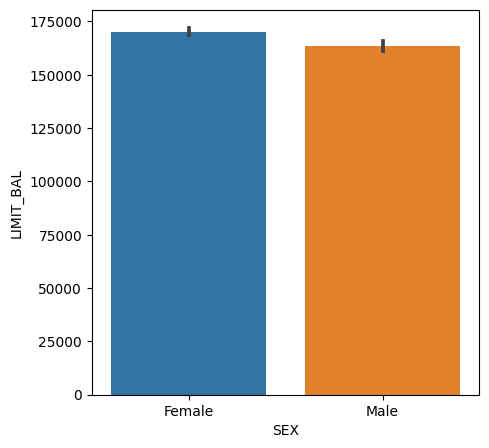

In [276]:
Sex_name=Update_data["SEX"].apply(lambda x :'Male' if x==1 else 'Female')
plt.figure(figsize=(5,5))

sns.barplot(x=Sex_name,y=Update_data.LIMIT_BAL)

In [277]:
Update_data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,col1,col2
0,1,20000,2,2,1,24,2,2,-1,-1,...,-2,0,689,0,0,0,0,1,-107402.351395,1829.455358
1,2,120000,2,2,2,26,-1,2,0,0,...,2,0,1000,1000,1000,0,2000,1,-103973.725753,-3335.699307


In [278]:
Update_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
Name: MARRIAGE, dtype: int64

In [279]:
#X4: Marital status (1 = married; 2 = single; 3 = others)

R_others=Update_data.drop(Update_data[Update_data['MARRIAGE']==3].index)

In [280]:
R_others['MARRIAGE'].value_counts()

2    15964
1    13659
Name: MARRIAGE, dtype: int64

In [281]:
C_Name=R_others['MARRIAGE'].apply( lambda m :'Married'
    if m==1
    else 'Single'
)

In [282]:
C_Name

0        Married
1         Single
2         Single
3        Married
4        Married
          ...   
29941    Married
29942     Single
29943     Single
29944    Married
29945    Married
Name: MARRIAGE, Length: 29623, dtype: object

<Axes: xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

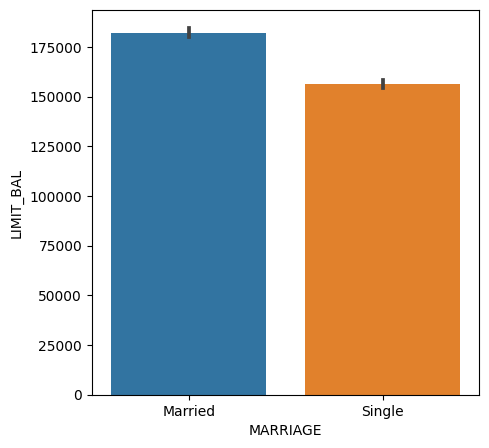

In [283]:
plt.figure(figsize=(5,5))
sns.barplot(x=C_Name , y=Update_data.LIMIT_BAL)

In [284]:
Update_data.groupby('SEX')['LIMIT_BAL'].sum()

SEX
1    1942103680
2    3075246000
Name: LIMIT_BAL, dtype: int64

Model Creation

In [285]:
Update_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,col1,col2
0,1,20000,2,2,1,24,2,2,-1,-1,...,-2,0,689,0,0,0,0,1,-107402.351395,1829.455358
1,2,120000,2,2,2,26,-1,2,0,0,...,2,0,1000,1000,1000,0,2000,1,-103973.725753,-3335.699307
2,3,90000,2,2,2,34,0,0,0,0,...,0,1518,1500,1000,1000,1000,5000,0,-68987.687776,2601.886613
3,4,50000,2,2,1,37,0,0,0,0,...,0,2000,2019,1200,1100,1069,1000,0,-14888.002559,11321.067548
4,5,50000,1,2,1,57,-1,0,-1,0,...,0,2000,36681,10000,9000,689,679,0,-66890.429559,-15898.129382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29941,29996,220000,1,3,1,39,0,0,0,0,...,0,8500,20000,5003,3047,5000,1000,0,200681.965297,148423.532876
29942,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,1837,3526,8998,129,0,0,0,-102261.290642,-4431.353303
29943,29998,30000,1,2,2,37,4,3,2,-1,...,0,0,0,22000,4200,2000,3100,1,-83800.081007,-22833.493335
29944,29999,80000,1,3,1,41,1,-1,0,0,...,-1,85900,3409,1178,1926,52964,1804,1,-1476.137993,-10494.322232


In [286]:
df


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29941,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29942,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29943,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29944,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [288]:
# dummy Catogarical Varieble
df_cat = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

dummy = pd.get_dummies( df,columns=df_cat)



In [289]:
dummy.shape

(29946, 92)

In [290]:
dummy=pd.get_dummies(df,columns=df_cat)

In [291]:
dummy['Default'].value_counts()

0    23315
1     6631
Name: Default, dtype: int64

In [292]:
dummy.drop(columns=df_cat)

KeyError: ignored

In [293]:
dummy.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default', 'SEX_1',
       'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2',
       'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8',
       'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3',
       'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2',
       'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4',
       'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1',
       'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0',
       'PAY_5_2', 'PAY_5_3', '

In [205]:
y_new = y_new = np.where(dummy['Default'] == 1, 'Yes', 'No')

In [206]:
y_new

array(['Yes', 'Yes', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype='<U3')

In [207]:
y=dummy.Default

In [208]:
x=dummy.drop(['ID','Default'],axis=1)

In [209]:
x

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29941,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,...,0,0,1,0,0,0,0,0,0,0
29942,150000,43,1683,1828,3502,8979,5190,0,1837,3526,...,0,0,1,0,0,0,0,0,0,0
29943,30000,37,3565,3356,2758,20878,20582,19357,0,0,...,0,0,1,0,0,0,0,0,0,0
29944,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,...,0,1,0,0,0,0,0,0,0,0


In [210]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29941    0
29942    0
29943    1
29944    1
29945    1
Name: Default, Length: 29946, dtype: int64

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [213]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((23956, 90), (5990, 90), (23956,), (5990,))

In [215]:
df.shape

(29946, 25)

In [295]:
from sklearn.ensemble import RandomForestClassifier

In [296]:
model=RandomForestClassifier()

In [298]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [300]:
model.score(x_test,y_test)



0.8121869782971619

In [301]:
from sklearn.preprocessing import StandardScaler

In [302]:
scal=StandardScaler()

In [304]:
x_test_s=scal.fit_transform(x_test)


In [305]:
x_train_s=scal.fit_transform(x_train)

In [306]:
model.fit(x_train_s,y_train)

RandomForestClassifier()

In [308]:
model.score(x_test_s,y_test)


0.8180300500834724

In [309]:
from sklearn.linear_model import LogisticRegression

In [310]:
model2=LogisticRegression()

In [311]:
model2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [312]:
model2.score(x_test,y_test)model2.score(x_test,y_test)

0.7803005008347246

In [313]:
model2.fit(x_train_s,y_train)

LogisticRegression()

In [314]:
model2.score(x_test_s,y_test)

0.8193656093489149

In [315]:
from sklearn.neighbors import KNeighborsClassifier

In [316]:
model3=KNeighborsClassifier()

In [317]:
model3.fit(x_train,y_train)

KNeighborsClassifier()

In [319]:
model3.score(x_test,y_test)

0.7590984974958264

In [320]:
model3.fit(x_train_s,y_train)

KNeighborsClassifier()

In [321]:
model3.score(x_test_s,y_test)

0.7929883138564274

In [322]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier

In [326]:
model5=ExtraTreesClassifier()

In [327]:
model5.fit(x_train,y_train)

ExtraTreesClassifier()

In [329]:
model5.score(x_test,y_test)

0.8088480801335559

In [330]:
model5.fit(x_train_s,y_train)

ExtraTreesClassifier()

In [331]:
model5.score(x_test_s,y_test)

0.8118530884808013

In [332]:
model6=GradientBoostingClassifier()

In [333]:
model6.fit(x_train,y_train)

GradientBoostingClassifier()

In [334]:
model6.score(x_test,y_test)

0.8173622704507513

In [335]:
model6.fit(x_train_s,y_train)

GradientBoostingClassifier()

In [336]:
model6.score(x_test_s,y_test)

0.8186978297161936

In [337]:
model7=AdaBoostClassifier()

In [338]:
model7.fit(x_train,y_train)

AdaBoostClassifier()

In [340]:
model7.score(x_test_,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.7978297161936561

In [341]:
model7.fit(x_train_s,y_train)

AdaBoostClassifier()

In [342]:
model7.score(x_test_s,y_test)

0.8148580968280468

In [344]:
estimators = []
estimators.append(('RF', RandomForestClassifier()))
estimators.append(('XT', ExtraTreesClassifier()))

vt_clf = VotingClassifier(estimators = estimators, voting='soft')
vt_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('XT', ExtraTreesClassifier())],
                 voting='soft')

In [345]:
vt_clf.score(x_test,y_test)

0.813355592654424